In [1]:
#data processing package
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

In [2]:
#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#NLP packages
from textblob import TextBlob

import warnings 
warnings.filterwarnings('ignore')

In [4]:
#Testing NLP -Sentiment Analysis using TextBlob
TextBlob("Today is a busy day").sentiment

Sentiment(polarity=0.1, subjectivity=0.3)

In [5]:
#Importing Youtube comments data
comm = pd.read_csv("filter62d1640173ea4_csv.csv")

In [6]:
comm.head()

,Unnamed: 0,Unnamed: 1,Name (click to view profile),Date,Likes,isHearted,isPinned,Comment,Profile ID,Comment ID,Comment URL
0,1,NaN,LoveaHusky,2021-05-13 02:23:01,2,no,no,This sounds as scripted as an elementary school play,UC4EteVDapn0EFBtgP0wCK6Q,UgwoIDuJTg41I9z8JaN4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgwoIDuJTg41I9z8JaN4AaABAg
1,2,NaN,LoveaHusky,2021-05-13 02:23:35,2,no,no,"Those brows, wake up everyone",UC4EteVDapn0EFBtgP0wCK6Q,UgxaGbSppWCKp9vksqR4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgxaGbSppWCKp9vksqR4AaABAg
2,3,NaN,SonicArchives,2021-05-13 15:41:33,1,no,no,Marrying Bill gates makes you an automatic expert on all topics.,UCeobR7jYq6ZD1rgC1Rr8ofA,Ugwspo6AooXdOdy5c6Z4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=Ugwspo6AooXdOdy5c6Z4AaABAg
3,4,NaN,Jil May,2021-05-14 01:21:39,1,no,no,She moves like a robot,UCjBsLpbwfIDADmTCFvK2HJg,UgzGxFzPb-7FFzoQJ7R4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgzGxFzPb-7FFzoQJ7R4AaABAg
4,5,NaN,ufc354811,2021-05-14 01:38:17,3,no,no,That is one beautiful man,UCqb1Z5VlQ1ht6wclV14itnQ,UgzaohE2K0Fl3IiyFDR4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgzaohE2K0Fl3IiyFDR4AaABAg


In [7]:
comm.shape

(100, 11)

In [8]:
import re

In [9]:
#removing punctuations, numbers and special characters.
comm["Comment"] =comm["Comment"].str.replace("[^a-zA-Z#]", " ")

In [10]:
#changing the text to lower case
comm["Comment"] = comm["Comment"].apply(lambda x: x.lower())

In [11]:
#Tokenization
tokenized_comm = comm["Comment"].apply(lambda x: x.split())
tokenized_comm.head()

0                 [this, sounds, as, scripted, as, an, elementary, school, play]
1                                             [those, brows, wake, up, everyone]
2    [marrying, bill, gates, makes, you, an, automatic, expert, on, all, topics]
3                                                   [she, moves, like, a, robot]
4                                                [that, is, one, beautiful, man]
Name: Comment, dtype: object

In [14]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [12]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [13]:
wnl = WordNetLemmatizer()

In [14]:
import nltk
nltk.download('stopwords')
tokenized_comm.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))])
tokenized_comm.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhoushimi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                 [this, sounds, as, scripted, as, an, elementary, school, play]
1                                             [those, brows, wake, up, everyone]
2    [marrying, bill, gates, makes, you, an, automatic, expert, on, all, topics]
3                                                   [she, moves, like, a, robot]
4                                                [that, is, one, beautiful, man]
Name: Comment, dtype: object

In [15]:
for i in range(len(tokenized_comm)):
    tokenized_comm[i] = ' '.join(tokenized_comm[i])
comm['Comment'] = tokenized_comm

In [16]:
# sentiment analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zhoushimi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
#Setting the sentiment scores
comm['Sentiment Scores'] = comm['Comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [18]:
comm.head()

,Unnamed: 0,Unnamed: 1,Name (click to view profile),Date,Likes,isHearted,isPinned,Comment,Profile ID,Comment ID,Comment URL,Sentiment Scores
0,1,NaN,LoveaHusky,2021-05-13 02:23:01,2,no,no,this sounds as scripted as an elementary school play,UC4EteVDapn0EFBtgP0wCK6Q,UgwoIDuJTg41I9z8JaN4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgwoIDuJTg41I9z8JaN4AaABAg,0.3400
1,2,NaN,LoveaHusky,2021-05-13 02:23:35,2,no,no,those brows wake up everyone,UC4EteVDapn0EFBtgP0wCK6Q,UgxaGbSppWCKp9vksqR4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgxaGbSppWCKp9vksqR4AaABAg,0.0000
2,3,NaN,SonicArchives,2021-05-13 15:41:33,1,no,no,marrying bill gates makes you an automatic expert on all topics,UCeobR7jYq6ZD1rgC1Rr8ofA,Ugwspo6AooXdOdy5c6Z4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=Ugwspo6AooXdOdy5c6Z4AaABAg,0.0000
3,4,NaN,Jil May,2021-05-14 01:21:39,1,no,no,she moves like a robot,UCjBsLpbwfIDADmTCFvK2HJg,UgzGxFzPb-7FFzoQJ7R4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgzGxFzPb-7FFzoQJ7R4AaABAg,0.3612
4,5,NaN,ufc354811,2021-05-14 01:38:17,3,no,no,that is one beautiful man,UCqb1Z5VlQ1ht6wclV14itnQ,UgzaohE2K0Fl3IiyFDR4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgzaohE2K0Fl3IiyFDR4AaABAg,0.5994


In [19]:
#Classifying the sentiment scores as positive, negative and neutral
comm['Sentiment'] = comm['Sentiment Scores'].apply(lambda s: 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))


In [20]:
comm.head(10)

,Unnamed: 0,Unnamed: 1,Name (click to view profile),Date,Likes,isHearted,isPinned,Comment,Profile ID,Comment ID,Comment URL,Sentiment Scores,Sentiment
0,1,NaN,LoveaHusky,2021-05-13 02:23:01,2,no,no,this sounds as scripted as an elementary school play,UC4EteVDapn0EFBtgP0wCK6Q,UgwoIDuJTg41I9z8JaN4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgwoIDuJTg41I9z8JaN4AaABAg,0.3400,Positive
1,2,NaN,LoveaHusky,2021-05-13 02:23:35,2,no,no,those brows wake up everyone,UC4EteVDapn0EFBtgP0wCK6Q,UgxaGbSppWCKp9vksqR4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgxaGbSppWCKp9vksqR4AaABAg,0.0000,Neutral
2,3,NaN,SonicArchives,2021-05-13 15:41:33,1,no,no,marrying bill gates makes you an automatic expert on all topics,UCeobR7jYq6ZD1rgC1Rr8ofA,Ugwspo6AooXdOdy5c6Z4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=Ugwspo6AooXdOdy5c6Z4AaABAg,0.0000,Neutral
3,4,NaN,Jil May,2021-05-14 01:21:39,1,no,no,she moves like a robot,UCjBsLpbwfIDADmTCFvK2HJg,UgzGxFzPb-7FFzoQJ7R4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgzGxFzPb-7FFzoQJ7R4AaABAg,0.3612,Positive
4,5,NaN,ufc354811,2021-05-14 01:38:17,3,no,no,that is one beautiful man,UCqb1Z5VlQ1ht6wclV14itnQ,UgzaohE2K0Fl3IiyFDR4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgzaohE2K0Fl3IiyFDR4AaABAg,0.5994,Positive
5,6,NaN,M D,2021-05-15 16:12:42,0,no,no,yeah the satanic upside down cross and madonna s video from eurovision quervo not everyone is coming to the future is all a great big conspiracy theory right jesuit oath you have been taught your ...,UCfxQppajdicJWSbz6weShgg,Ugys_UiPKelEPLC2P894AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=Ugys_UiPKelEPLC2P894AaABAg,0.5267,Positive
6,7,NaN,Venomproyt,2021-05-17 05:08:51,2,no,no,https youtu be sf ev exg w,UCBfeq44WbGD27UP9ax29GXg,Ugwikx9qr68pVJhXR6t4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=Ugwikx9qr68pVJhXR6t4AaABAg,0.0000,Neutral
7,8,NaN,Daryll Dela Rosa,2021-05-19 23:39:53,0,no,no,jesus this comment section is full of incels,UCmYS0sNVKFKfcjx0yXcC1pQ,UgwVQF9de-4f1JiRYKh4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgwVQF9de-4f1JiRYKh4AaABAg,0.0000,Neutral
8,9,NaN,Nick Spiracy,2021-05-20 02:43:53,0,no,no,nice upside down cross,UCXxJxnUXtsUw49dsYXVIT-Q,UgwRpMSV4qKNSy96a0R4AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=UgwRpMSV4qKNSy96a0R4AaABAg,0.4215,Positive
9,10,NaN,Nick Spiracy,2021-05-20 02:44:49,0,no,no,nice masks ladies,UCXxJxnUXtsUw49dsYXVIT-Q,Ugx4RHuDwbykzN6_6L54AaABAg,https://www.youtube.com/watch?v=DEDqsEjhQYk&lc=Ugx4RHuDwbykzN6_6L54AaABAg,0.4215,Positive


In [21]:
comm.Sentiment.value_counts()

Neutral     42
Positive    35
Negative    23
Name: Sentiment, dtype: int64

In [22]:
y=comm['Sentiment'].values
y.shape


(100,)

In [23]:
x=comm['Comment'].values
x.shape

(100,)

In [24]:
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline

In [25]:
#Train-test split
from sklearn.model_selection import train_test_split

In [26]:
#60% for train and 40% for test
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape


(40,)

In [27]:
x_train.shape

(60,)

In [28]:
y_train.shape

(60,)

In [29]:
x_test.shape

(40,)

In [30]:
y_test.shape

(40,)

In [31]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'Comments'})

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

df_train.head()

,Comments,sentiment
0,w o m e n hahaha riiiiiiight,Positive
1,i bet next time bill will marry a woman,Neutral
2,manlinda,Neutral
3,thats a man baby,Neutral
4,operation depopulation and that s not even a woman,Neutral


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comments   60 non-null     object
 1   sentiment  60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [33]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'Comments'})

df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

df_test.head()

,Comments,sentiment
0,she looks like a dude,Positive
1,https youtu be sf ev exg w,Neutral
2,hi we remove from the body vaccines modern faizer johnson astrozadek and other wickedness invented by creatures,Neutral
3,upside down cross,Neutral
4,and they say i was evil,Neutral


In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comments   40 non-null     object
 1   sentiment  60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [35]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

#storing the puntuation free text in a new column called clean_msg
df_train['Comments']= df_train['Comments'].apply(lambda x:remove_punctuation(x))
df_test['Comments']= df_test['Comments'].apply(lambda x:remove_punctuation(x))

In [37]:
df_train.head()
#punctuations are removed from comments column in train dataset

,Comments,sentiment
0,w o m e n hahaha riiiiiiight,Positive
1,i bet next time bill will marry a woman,Neutral
2,manlinda,Neutral
3,thats a man baby,Neutral
4,operation depopulation and that s not even a woman,Neutral


In [38]:
import nltk
from nltk.corpus import stopwords

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhoushimi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)


def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [41]:
#sample!
generate_N_grams("I am so happy",2)

Sentence after removing stopwords: ['I', 'happy']


['I happy']

In [42]:
#Create unigrams
from collections import defaultdict

In [43]:
#get the count of every word in both the columns of df_train and df_test dataframes
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)


In [44]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="Positive"].Comments:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="Negative"].Comments:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="Neutral"].Comments:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['w', 'e', 'n', 'hahaha', 'riiiiiiight']
Sentence after removing stopwords: ['nice', 'masks', 'ladies']
Sentence after removing stopwords: ['wow', 'whoa', 'upside', 'cross', 'see', 'really', 'well', 'beginning', 'different', 'angle']
Sentence after removing stopwords: ['yeah', 'satanic', 'upside', 'cross', 'madonna', 'video', 'eurovision', 'quervo', 'everyone', 'coming', 'future', 'great', 'big', 'conspiracy', 'theory', 'right', 'jesuit', 'oath', 'taught', 'duty', 'spy', 'gather', 'statistics', 'facts', 'information', 'power', 'every', 'source', 'ingratiate', 'confidence', 'family', 'circle', 'protestants', 'heretics', 'every', 'class', 'character', 'well', 'merchant', 'banker', 'lawyer', 'among', 'schools', 'universities', 'parliaments', 'legislatures', 'judiciaries', 'councils', 'state', 'things', 'men', 'pope', 'sake', 'whose', 'servants', 'unto', 'death']
Sentence after removing stopwords: ['love']
Sentence after removing stopwords: ['kevin', 'kli

In [45]:
positiveValues
#output is a dictionary-list of words in news column and the count of each of these words in train dataset where sentiment=positive

defaultdict(int,
            {'w': 1,
             'e': 1,
             'n': 1,
             'hahaha': 1,
             'riiiiiiight': 1,
             'nice': 3,
             'masks': 1,
             'ladies': 2,
             'wow': 2,
             'whoa': 1,
             'upside': 4,
             'cross': 4,
             'see': 2,
             'really': 2,
             'well': 3,
             'beginning': 1,
             'different': 1,
             'angle': 1,
             'yeah': 1,
             'satanic': 1,
             'madonna': 1,
             'video': 1,
             'eurovision': 1,
             'quervo': 1,
             'everyone': 2,
             'coming': 1,
             'future': 2,
             'great': 1,
             'big': 1,
             'conspiracy': 1,
             'theory': 1,
             'right': 1,
             'jesuit': 1,
             'oath': 1,
             'taught': 1,
             'duty': 1,
             'spy': 1,
             'gather': 1,
             'sta

In [46]:
positiveValues.items()
#o/p is a dictionary with the word in comments column as key and its count within the train dataset as its corresponding value

dict_items([('w', 1), ('e', 1), ('n', 1), ('hahaha', 1), ('riiiiiiight', 1), ('nice', 3), ('masks', 1), ('ladies', 2), ('wow', 2), ('whoa', 1), ('upside', 4), ('cross', 4), ('see', 2), ('really', 2), ('well', 3), ('beginning', 1), ('different', 1), ('angle', 1), ('yeah', 1), ('satanic', 1), ('madonna', 1), ('video', 1), ('eurovision', 1), ('quervo', 1), ('everyone', 2), ('coming', 1), ('future', 2), ('great', 1), ('big', 1), ('conspiracy', 1), ('theory', 1), ('right', 1), ('jesuit', 1), ('oath', 1), ('taught', 1), ('duty', 1), ('spy', 1), ('gather', 1), ('statistics', 1), ('facts', 1), ('information', 1), ('power', 1), ('every', 2), ('source', 1), ('ingratiate', 1), ('confidence', 1), ('family', 1), ('circle', 1), ('protestants', 1), ('heretics', 1), ('class', 1), ('character', 1), ('merchant', 1), ('banker', 1), ('lawyer', 1), ('among', 1), ('schools', 1), ('universities', 1), ('parliaments', 1), ('legislatures', 1), ('judiciaries', 1), ('councils', 1), ('state', 1), ('things', 1), ('

In [47]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

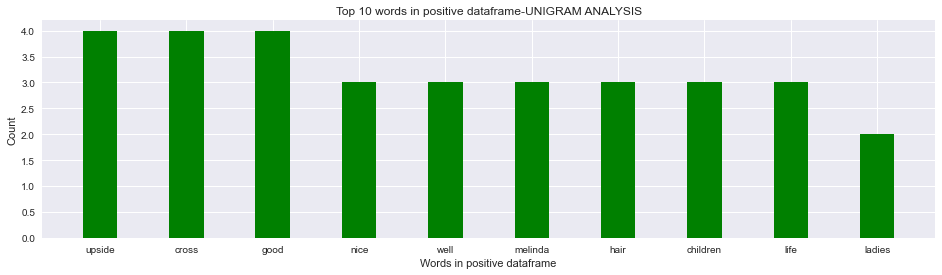

In [48]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]


plt.figure(1,figsize=(16,4))

plt.bar(pd1,pd2, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")

plt.savefig("positive-unigram.png")
plt.show()


In [49]:
df_positive.head(10)

,0,1
0,upside,4
1,cross,4
2,good,4
3,nice,3
4,well,3
5,melinda,3
6,hair,3
7,children,3
8,life,3
9,ladies,2


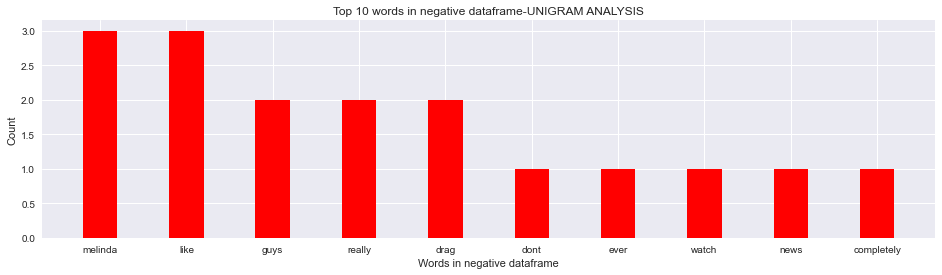

In [50]:
plt.figure(1,figsize=(16,4))

plt.bar(ned1,ned2, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")

plt.savefig("negative-unigram.png")
plt.show()

In [51]:
df_negative.head(10)

,0,1
0,melinda,3
1,like,3
2,guys,2
3,really,2
4,drag,2
5,dont,1
6,ever,1
7,watch,1
8,news,1
9,completely,1


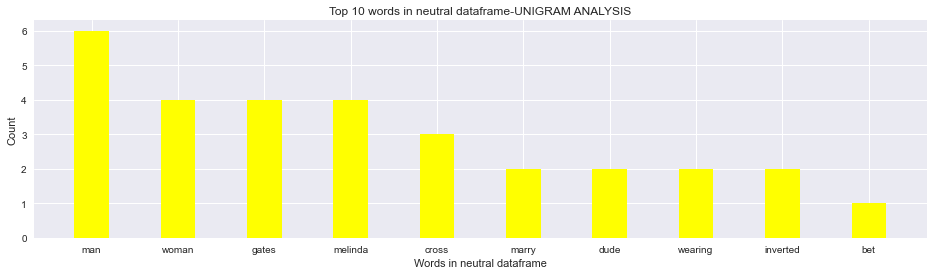

In [52]:
plt.figure(1,figsize=(16,4))

plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")

plt.savefig("neutral-unigram.png")
plt.show()

In [53]:
df_neutral.head(10)

,0,1
0,man,6
1,woman,4
2,gates,4
3,melinda,4
4,cross,3
5,marry,2
6,dude,2
7,wearing,2
8,inverted,2
9,bet,1


In [54]:
#Creating bigrams
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [55]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="Positive"].Comments:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="Negative"].Comments:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="Neutral"].Comments:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['w', 'e', 'n', 'hahaha', 'riiiiiiight']
Sentence after removing stopwords: ['nice', 'masks', 'ladies']
Sentence after removing stopwords: ['wow', 'whoa', 'upside', 'cross', 'see', 'really', 'well', 'beginning', 'different', 'angle']
Sentence after removing stopwords: ['yeah', 'satanic', 'upside', 'cross', 'madonna', 'video', 'eurovision', 'quervo', 'everyone', 'coming', 'future', 'great', 'big', 'conspiracy', 'theory', 'right', 'jesuit', 'oath', 'taught', 'duty', 'spy', 'gather', 'statistics', 'facts', 'information', 'power', 'every', 'source', 'ingratiate', 'confidence', 'family', 'circle', 'protestants', 'heretics', 'every', 'class', 'character', 'well', 'merchant', 'banker', 'lawyer', 'among', 'schools', 'universities', 'parliaments', 'legislatures', 'judiciaries', 'councils', 'state', 'things', 'men', 'pope', 'sake', 'whose', 'servants', 'unto', 'death']
Sentence after removing stopwords: ['love']
Sentence after removing stopwords: ['kevin', 'kli

In [56]:

#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

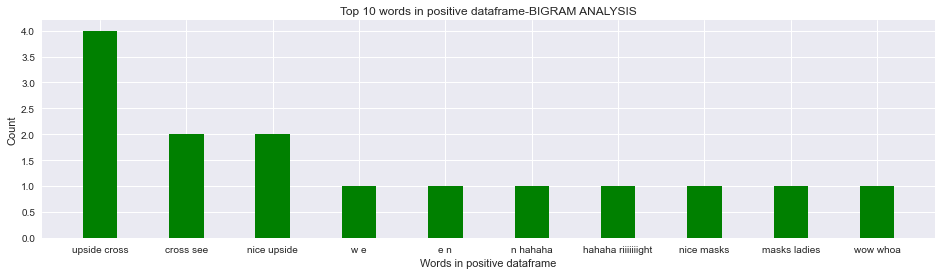

In [57]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

In [58]:
df_positive2.head(10)

,0,1
0,upside cross,4
1,cross see,2
2,nice upside,2
3,w e,1
4,e n,1
5,n hahaha,1
6,hahaha riiiiiiight,1
7,nice masks,1
8,masks ladies,1
9,wow whoa,1


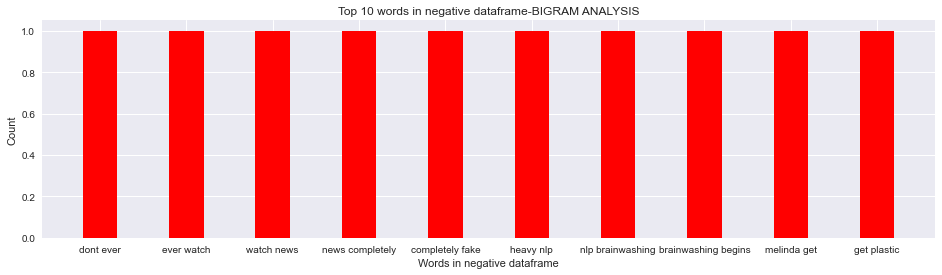

In [59]:
plt.figure(1,figsize=(16,4))

plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")

plt.savefig("negative-bigram.png")
plt.show()

In [60]:
df_negative2.head(10)

,0,1
0,dont ever,1
1,ever watch,1
2,watch news,1
3,news completely,1
4,completely fake,1
5,heavy nlp,1
6,nlp brainwashing,1
7,brainwashing begins,1
8,melinda get,1
9,get plastic,1


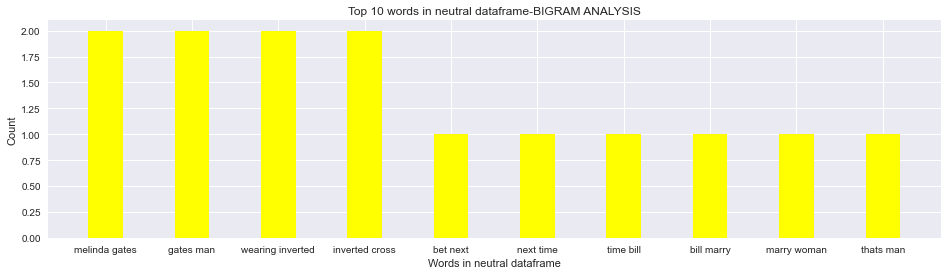

In [61]:
plt.figure(1,figsize=(16,4))

plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")

plt.savefig("neutral-bigram.png")
plt.show()

In [62]:
df_neutral2.head(10)

,0,1
0,melinda gates,2
1,gates man,2
2,wearing inverted,2
3,inverted cross,2
4,bet next,1
5,next time,1
6,time bill,1
7,bill marry,1
8,marry woman,1
9,thats man,1


In [63]:
#Creating trigrams
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [64]:

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="Positive"].Comments:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="Negative"].Comments:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="Neutral"].Comments:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

Sentence after removing stopwords: ['w', 'e', 'n', 'hahaha', 'riiiiiiight']
Sentence after removing stopwords: ['nice', 'masks', 'ladies']
Sentence after removing stopwords: ['wow', 'whoa', 'upside', 'cross', 'see', 'really', 'well', 'beginning', 'different', 'angle']
Sentence after removing stopwords: ['yeah', 'satanic', 'upside', 'cross', 'madonna', 'video', 'eurovision', 'quervo', 'everyone', 'coming', 'future', 'great', 'big', 'conspiracy', 'theory', 'right', 'jesuit', 'oath', 'taught', 'duty', 'spy', 'gather', 'statistics', 'facts', 'information', 'power', 'every', 'source', 'ingratiate', 'confidence', 'family', 'circle', 'protestants', 'heretics', 'every', 'class', 'character', 'well', 'merchant', 'banker', 'lawyer', 'among', 'schools', 'universities', 'parliaments', 'legislatures', 'judiciaries', 'councils', 'state', 'things', 'men', 'pope', 'sake', 'whose', 'servants', 'unto', 'death']
Sentence after removing stopwords: ['love']
Sentence after removing stopwords: ['kevin', 'kli

In [65]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

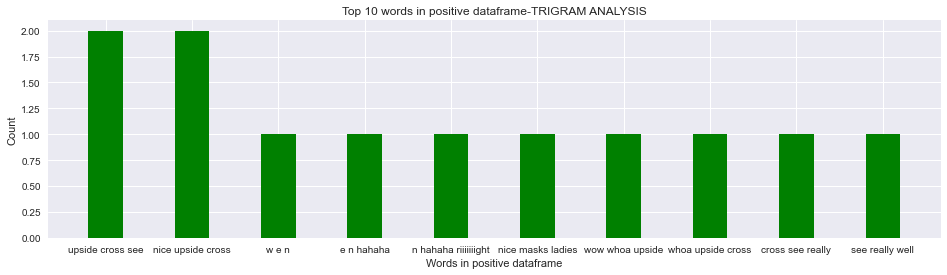

In [66]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

plt.savefig("positive-trigram.png")
plt.show()

In [67]:

df_positive3.head(10)

,0,1
0,upside cross see,2
1,nice upside cross,2
2,w e n,1
3,e n hahaha,1
4,n hahaha riiiiiiight,1
5,nice masks ladies,1
6,wow whoa upside,1
7,whoa upside cross,1
8,cross see really,1
9,see really well,1


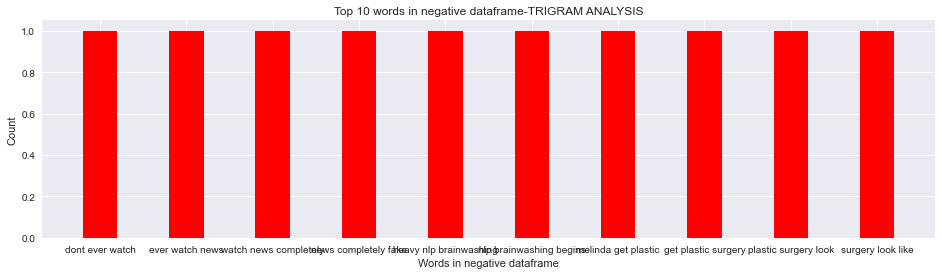

In [68]:
plt.figure(1,figsize=(16,4))

plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")

plt.savefig("negative-trigram.png")
plt.show()

In [69]:
df_negative3.head(10)

,0,1
0,dont ever watch,1
1,ever watch news,1
2,watch news completely,1
3,news completely fake,1
4,heavy nlp brainwashing,1
5,nlp brainwashing begins,1
6,melinda get plastic,1
7,get plastic surgery,1
8,plastic surgery look,1
9,surgery look like,1


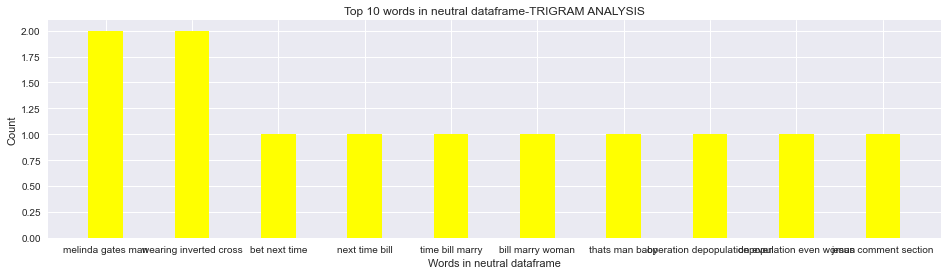

In [70]:
plt.figure(1,figsize=(16,4))

plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")

plt.savefig("neutral-trigram.png")
plt.show()

In [71]:
df_neutral3.head(10)

,0,1
0,melinda gates man,2
1,wearing inverted cross,2
2,bet next time,1
3,next time bill,1
4,time bill marry,1
5,bill marry woman,1
6,thats man baby,1
7,operation depopulation even,1
8,depopulation even woman,1
9,jesus comment section,1
